# Source free series circuit
Last update: 6 May 2022  

Todo:  
- clean up code
- clean up narative
- check math
- check with LTspice, check voltage and currents thru components
- spell check

In this notebook, the Python modules SymPy and SciPy are used to solve for currents and voltages in the circuit from the characteristic differential equation. The JupyterLab notebook is located [here](https://github.com/Tiburonboy/EE_jupyter_notebooks).

A source free series RLC circuit consists of a resistor, capacitor and inductor connected in series with some initial energy stored either in the inductor, capacitor or both. Since the circuit is a single loop, the current flowing around the loop is the same current in each component. Both parallel and series connected circuits are usually presented in electrical circuit analysis classes. The two textbooks I used while in college presented the parallel connected circuit in some detail then kind of glossed over the series connect circuit since it is the dual of the other. The circuit to be analized is shown below and was drawn using EasyEDA, the link to the schematic is [here](https://easyeda.com/editor#mode=sim,id=|6b1460bfe8ec4872b7d7fd3038f38331|82658727399e487c94ebe177746e0ba0|ea67be55cc5c49f288edfa4ed837b1f0|8ea3b89798114238a453a1c678008c07|bef561e1caa74d498d621a82362fc683|3b000d947aad4568aba52d9cefa5715c|6d4bde5f240f4f55b15aaeee1ee6dc47).  

![schematic](Sch_series_RLC.png)

This notebook will look at SymPy and SciPy based solutions for the voltage and currents in the circuit. Initial conditions will be either the voltage on the capacitor or the current in the inductor.

Several python libraries are used. NumPy is the fundamental package for scientific computing in Python. SciPy is a collection of mathematical algorithms and convenience functions built on the NumPy extension of Python. Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python. SymPy is a Python library for symbolic mathematics. The init_printing() function will allow the Jupyter notebook to render equations in the best format.

In [278]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from sympy import *
init_printing()

## SymPy solution, given $i(t)=1$ and $i'(t)=0$ at $t=0$
The current at t=0 is 1 amp and the change in current at t=0 is 0 (a constraint needed to solve for the constants as shown later). By use of Kirchhoff's current law, the current around the loop is the same current flowing in each component and sum of the potential differences (voltages) around the loop is zero. Within SymPy we can delare variable, t, for time and tell Sympy that t is only positive. Also we can define the function i(t) as the current in the loop by using the class sympy.core.function.Function.

In [279]:
t = symbols('t',positive=True)  # t > 0
i = Function('i')(t)

The symbols L, R and C are used for inductance, resistance and capacitance. 

In [280]:
L, R, C = symbols('L R C')

The voltage current relation of the components in the circuit is defind as follows: The voltage across the resistor is defined by Ohm's law and is $Ri(t)=v(t)$. An inductor is an electrical component that stores energy in a magnetic field when electric current flows through it. The voltage across the terminals is the derivative of the current, $L\frac{d}{dt}i(t)=v(t)$. A capacitor is a device that stores energy in an electric field. The terminal voltage is defined by $\frac{1}{C}\int_0^{\tau}{i(t)}dt=v(t)$.

The sum of voltages on each of the components around the loop is equal to zero and the equation is written as: $L\frac{d}{dt}i(t)+Ri(t)+\frac{1}{C}\int_0^{\tau}{i(t)}dt=0$

When both sides are differenctiated with respect to time the result is a homogenious differential equation. The unknown function is the current i(t) and the solution to the differential equation is the natural response.

The variable zero is defined as a constant so that it make be included in the SymPy equation and differented without SymPy returning an error.

In [281]:
zero = symbols('zero',constant = True)

loop_voltage is the the differential equation that says the sum of thevoltages arround the loop is equal to zero.

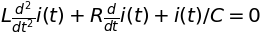

In [282]:
loop_voltage = Eq((L*i.diff(t)+R*i+Integral(i,t)/C).diff(t),(zero).diff(t))
loop_voltage

The SymPy function dsolve is used to find the solution to most kinds of ordinary differential equation and system of ordinary differential equations. Except for the evaluation of the constants, C1 and C2, the response is shown below.

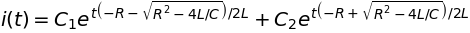

In [283]:
loop_current = dsolve(loop_voltage,i)
loop_current

At t=0, the loop current is 1 amp as stated above. The following line of Python code evaluates the right hand side (using args[1]) of the loop current equation at time zero (subs({t:0})) and equates it to 1 amp. 

In [284]:
Eq(loop_current.args[1].subs({t:0}),1)

The dirivative of the loop current is evaluated at t=0.

The derivative of the loop current is evaluated at t=0 and the result is set equal to zero. This is written as an equation using the following python code.

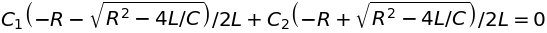

In [285]:
Eq(loop_current.args[1].diff(t).subs({t:0}),0)

The symbols C1 and C2 are declared for the constants in the solution for the differential equation and evaluation of the loop current equation at t=0 and the dirivatove at t=0 are put into matrix form as shown below. 

In [286]:
C1, C2 = symbols('C1 C2')
Matrix(
    [[Eq(loop_current.args[1].subs({t:0}),1)],
    [Eq(loop_current.args[1].diff(t).subs({t:0}),0)]])

⎡                      C₁ + C₂ = 1                      ⎤
⎢                                                       ⎥
⎢   ⎛         __________⎞      ⎛         __________⎞    ⎥
⎢   ⎜        ╱  2   4⋅L ⎟      ⎜        ╱  2   4⋅L ⎟    ⎥
⎢C₁⋅⎜-R -   ╱  R  - ─── ⎟   C₂⋅⎜-R +   ╱  R  - ─── ⎟    ⎥
⎢   ⎝     ╲╱         C  ⎠      ⎝     ╲╱         C  ⎠    ⎥
⎢──────────────────────── + ──────────────────────── = 0⎥
⎣          2⋅L                        2⋅L               ⎦

The Sympy function solve can be used to find a solution to these two equations and two unknowns.

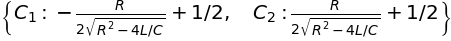

In [287]:
const = solve(Matrix(
    [[Eq(loop_current.args[1].subs({t:0}),1)],
    [Eq(loop_current.args[1].diff(t).subs({t:0}),0)]]),[C1, C2])

const

Substituting the constanst back into the orginal loop current equation we get the solution in symbolic form. 

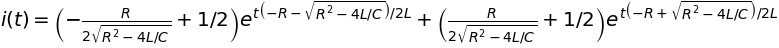

In [288]:
loop_current.subs(const)

Going future requires some numeric values for R, L and C. If the values of R, L and C are chosen that produce a negative square root, then the natural response is called under damped because the current waveform is a damped sinualsod. Values of R, L and C that don't have an imaginary exponent produce a natural responce that is called overdamped. Examples of the underdamed and overdamped responses are shown below.

Engineering text books ususally define the resonant frequency and the damping coefficient, then define the over, under and critically damped conditions in terms of the resonant frequency and the damping coefficient as follows:

resonant frequency: $\omega_o=\frac {1} {\sqrt{LC}}$, the frequency at which a system tends to oscillate in the absence of a driving force.

damping coefficient: $\alpha = \frac {R}{2RL}$, a  measure describing how oscillations in a system decay. 

Over damped: $\alpha > \omega_o$, the solution is the sum of two decaying exponentials with no oscillation.

Critical damped: $\alpha = \omega_o$,  the border between the overdamped and underdamped cases.

Under-damped:  $\alpha < \omega_o$, a decaying exponential combined with an oscillatory portion. The decaying sinusoild has a frequency of $\omega_d = \sqrt{\omega_o^2 + \alpha^2}$

## Over damped response
The condition for the over damped responce is satisfied by, $\frac{R}{2L}>\frac{1}{\sqrt{LC}}$. Chosing R=6, L=4 and C=1 will produce an over damped response. The element values are assigned with the Python dictinary type.

In [289]:
ele_values = {R:6,L:4,C:1}

Using the SymPy operator evalf() to convert to floating point.

In [290]:
alpha = (R/(2*L)).subs(ele_values)
print('alpha = {:.2f}'.format(alpha.evalf()))

w_o = (1/sqrt(L*C)).subs(ele_values)
print('natural frequency = {:.2f}, rad/s'.format(w_o.evalf()))

print('alpha > natural frequency = {:s}'.format(str(alpha > w_o)))

alpha = 0.75
natural frequency = 0.50, rad/s
alpha > natural frequency = True


Substitiny the values we get the following equation.

In [291]:
loop_current.subs(const).subs(ele_values)

The module lambdify is used to transform SymPy expressions to lambda functions which can be used to calculate numerical values.

In [292]:
func_current = lambdify(t, loop_current.subs(const).subs(ele_values).args[1]) 

Plottomh some points in a graph

Real and imag are plotted., imag is zero

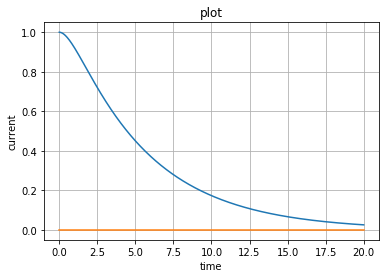

In [293]:
x = np.linspace(0, 20, 1000, endpoint=True)

plt.title('plot')

#plt.plot(x, func_current(x))
plt.plot(x, np.real(func_current(x)))
plt.plot(x, np.imag(func_current(x)))

plt.ylabel('current')
plt.xlabel('time')
#plt.legend()
plt.grid()
plt.show()

## Under damped response

Chosing R=0.5, L=1 and C=0.1 will produce an under damped response.

$\frac {R}{2L} < \frac {1} {\sqrt{LC}}$

The element values are assigned with the Python dictinary type.


In [294]:
ele_values = {R:0.5,L:1,C:0.1}

In [295]:
alpha = (R/(2*L)).subs(ele_values)
print('alpha = {:.2f}'.format(alpha.evalf()))

w_o = (1/sqrt(L*C)).subs(ele_values)
print('natural frequency = {:.2f}, rad/s'.format(w_o.evalf()))

print('alpha < natural frequency = {:s}'.format(str(alpha < w_o)))

alpha = 0.25
natural frequency = 3.16, rad/s
alpha < natural frequency = True


Substitiny the values we get the following equation.

In [296]:
loop_current.subs(const).subs(ele_values)

In [297]:
func_current = lambdify(t, loop_current.subs(const).subs(ele_values).args[1]) 

plotting

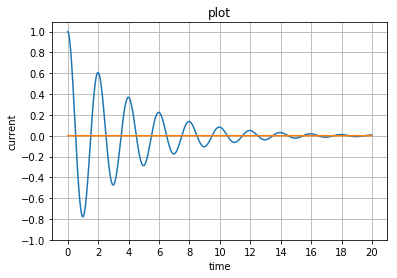

In [298]:
x = np.linspace(0, 20, 2000, endpoint=True)

plt.title('plot')

plt.plot(x, np.real(func_current(x)))
plt.plot(x, np.imag(func_current(x)))

plt.ylabel('current')
plt.xlabel('time')
#plt.ylim((-1,1))
plt.yticks(np.arange(-1, 1.1, 0.2))
#plt.xlim((0,20))
plt.xticks(np.arange(0, 20.1, 2.0))
#plt.legend()
plt.grid()
plt.show()

LTspice  
Current plot above looked correct, matches spice plot for current.

## solving for other circuit variables
The above solved for current, what are the voltages?

Voltage across the resistor

Equations don't have a reference node. What is the reference current loop direction?

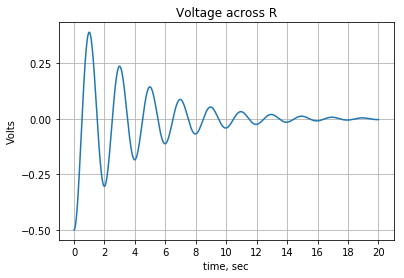

In [299]:
plt.title('Voltage across R')
R1 = 0.5
plt.plot(x,-R1*np.real(func_current(x)))

plt.ylabel('Volts')
plt.xlabel('time, sec')

plt.yticks(np.arange(-0.5, 0.5, 0.25))
plt.xticks(np.arange(0, 20+1, 2.0))
#plt.legend()
plt.grid()
plt.show()

Need to put a neg sign on the trace.  
This plot matches LTspice for voltage on the resistor. One end of R1 is tied to ground in LTspice. Trace starts at -0.5 volts then rises to alomost 0.5 volts

Voltage across the inductor](https://en.wikipedia.org/wiki/Inductor)

$L \frac {d}{dt}i(t)=v(t)$

no inital voltage because i(0) is not changing, just steady. 


NumPy does not provide general functionality to compute derivatives. It can handles the simple special case of polynomials however:

 use gradient and supply the spacing between f values


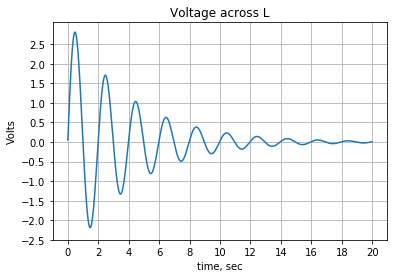

In [300]:
plt.title('Voltage across L')
L1 = 1
plt.plot(x, L1*np.gradient(-np.real(func_current(x)),x[1]-x[0]))

plt.ylabel('Volts')
plt.xlabel('time, sec')

plt.yticks(np.arange(-2.5, 3, .5))
plt.xticks(np.arange(0, 20+1, 2.0))
#plt.legend()
plt.grid()
plt.show()

Changing the sign of the current. According to LTspice amplitude should be almost 3v.
Plot above agrees with LTspice v(2) (node between L and C)  

The equations don't have a reference node defined. 

Voltage across the capacitor

$\frac {1}{C} \int_0^{\tau} {i(t)} dt + v(0)= v(t)$

what about i(0) = 1 ?


equations for [capacitor](https://en.wikipedia.org/wiki/Capacitor)

$V(t) = \frac {Q(t)}{C} = V(t_o)+\frac{1}{c} \int_{t_o}^t {I(\tau)d\tau}$

where Q is the charge stored in the capacitor

C = Q/V

A capacitance of one farad (F) means that one coulomb of charge on each conductor causes a voltage of one volt across the device

The current I(t) through any component in an electric circuit is defined as the rate of flow of a charge Q(t) passing through it, but actual charges – electrons – cannot pass through the dielectric layer of a capacitor.

$I(t)=\frac {dQ(t)}{dt} = C \frac {dV(t)}{dt}$

Vo=Q/C  ????   at 1 amp does Vo = 1/c or 10 volts???  no Vc is 0, because the diverative is 0.  But there is V=.5 because i(0)R = -0.5 and the sum of the voltages needs to be zero, so Vc(0) is 0.5 volts


### doing the integral add some comments 


In [301]:
x = np.linspace(0, 20, 2000, endpoint=True)

area = np.zeros(len(x))
for k in range(len(x)):
    area[k] = np.trapz(-np.real(func_current(x[0:k])),x=None,dx=x[1]-x[0])
    #area[k] = np.trapz(-np.real(func_current(x)),x=None,dx=x[1]-x[0])
    #area[k] = -np.real(func_current(k))*(x[1]-x[0])

plot

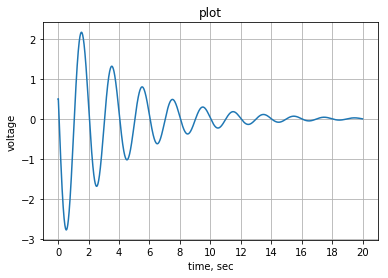

In [302]:
plt.title('plot')

#plt.plot(x, area   )
#plt.plot(x, -np.real(func_current(x)   ))
plt.plot(x, area/0.1 +  R1*np.real(func_current(0))  )

plt.ylabel('voltage')
plt.xlabel('time, sec')
#plt.yticks(np.arange(-2.5, 3, .5))
plt.xticks(np.arange(0, 20+1, 2.0))
#plt.legend()
plt.grid()
plt.show()


Spice results: R and C ends grounded.  current thru L is 1 at t=0, Spice shows I(L1)=1 at t=0. voltage on C goes from zero to almost 3V

re look at and invesigate why scipy solution for voltages on nodes.

## SciPy solution
Using SciPy to to numerically solve for the current in the series circuit.

$𝐿 \frac{𝑑^2}{𝑑𝑡^2}𝑖(𝑡)+𝑅 \frac{𝑑}{𝑑𝑡}𝑖(𝑡)+\frac {𝑖(𝑡)}{𝐶}=0$

$𝐿C \frac{𝑑^2}{𝑑𝑡^2}𝑖(𝑡)+𝑅C \frac{𝑑}{𝑑𝑡}𝑖(𝑡)+𝑖(𝑡)=0$

$𝐿Ci''+𝑅Ci'+𝑖=0$

rearrange equation: $i''=\frac {-Ri'-i}{CL}$  

$z'=i''$  

$z = i'$  

We now get

$z' =\frac {-RCz-i}{CL}$  

$z=i'$


# rename to circuit_model

In [303]:
def model(I, t):
    R = 0.5
    L = 1.0
    C = 0.1
    i = I[0]
    z = I[1]
    didt = z
    dzdt = (-C*R*z-i)/(L*C)
    return [didt, dzdt]

# describe these

In [304]:
t0 = 0
i0 = 1
z0 = 0
I0 = [i0, z0]

# clean up these comments
Using the SciPy function scipy.integrate.odeint to solve the differential equation.  


scipy.integrate.odeint(func, y0, t, args=(), Dfun=None, col_deriv=0, full_output=0, ml=None, mu=None, rtol=None, atol=None, tcrit=None, h0=0.0, hmax=0.0, hmin=0.0, ixpr=0, mxstep=0, mxhnil=0, mxordn=12, mxords=5, printmessg=0, tfirst=False)[source]


funccallable(y, t, …) or callable(t, y, …)
Computes the derivative of y at t. If the signature is callable(t, y, ...), then the argument tfirst must be set True.

y0array
Initial condition on y (can be a vector).

tarray
A sequence of time points for which to solve for y. The initial value point should be the first element of this sequence. This sequence must be monotonically increasing or monotonically decreasing; repeated values are allowed. 

https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html


In [305]:
t = np.linspace(0, 20,num=2000)
sol = odeint(model, I0, t)

plot

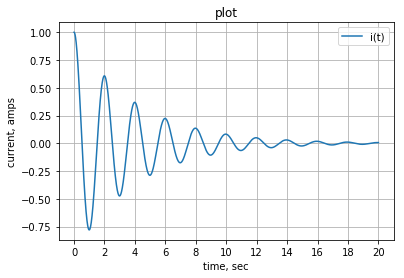

In [306]:
plt.title('plot')
plt.plot(t, sol[:,0], label='i(t)')
plt.ylabel('current, amps')
plt.xlabel('time, sec')
#plt.yticks(np.arange(-2.5, 3, .5))
plt.xticks(np.arange(0, 20+1, 2.0))
plt.legend()
plt.grid()
plt.show()

check if they are the same

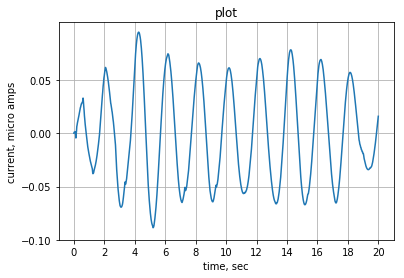

In [307]:
t = np.linspace(0, 20,num=2000)
sol = odeint(model, I0, t)

plt.title('plot')
plt.plot(t, (sol[:,0]-np.real(func_current(x)))*1e6)
plt.ylabel('current, micro amps')
plt.xlabel('time, sec')
plt.yticks(np.arange(-0.1, 0.1, .05))
plt.xticks(np.arange(0, 20+1, 2.0))
#plt.legend()
plt.grid()
plt.show()

## SymPy solution, given $Vc(t)=1$ and $Vc'(t)=0$ at $t=0$
If the initial condition for the series circuit has the voltage on the capacitor given, then the circuit equationcan be solved as follows. Declare the variable, t, for time and define it to be positive. Define a funtion, v, for the voltage across the capacitor and make it time dependent.

In [308]:
t = symbols('t',positive=True)  # t > 0
v = Function('v')(t)

The symbols L, R and C are used for inductance, resistance and capacitance.

In [309]:
# redefine since these variables were used above by SciPy
L, R, C = symbols('L R C')

The current through the capacitor is equal to the derivitave of the voltage, $C\frac{d}{dt}v(t)=i(t)$. The voltage across the series L and R is $L \frac {d}{dt}i(t)+Ri(t) = -v(t)$, where v(t) is the voltage across the capacitor. Since the current is the same in the loop, the capacitor current can be substituded in the equation to give: $CL\frac{d^2}{dt^2}v(t)+CR\frac{d}{dt}v(t)=-v(t)$  
The right hand side is negative since the voltage around the loop must sum to zero. The equation can be expressed in SymPy as: 

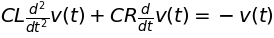

In [310]:
Eq(L*C*v.diff(t,t) + R*((C*v.diff(t))),  -v)

Using the SymPy function dsolve to find the capacitor voltage, we get:  

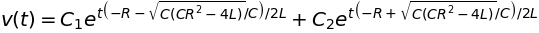

In [311]:
C_voltage = dsolve(Eq(L*C*v.diff(t,t) + R*C*v.diff(t),  -v))
C_voltage

at t = 0, voltage on capacitor is 1

In [312]:
Eq(C_voltage.args[1].subs({t:0}),1)

derivative of the capacitor voltage is 0

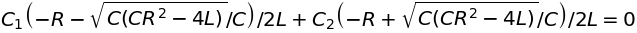

In [313]:
Eq(C_voltage.args[1].diff(t).subs({t:0}),0)

Using the two initial conditions, the constants can be solved for.

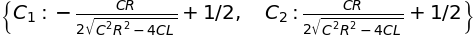

In [314]:
#C1, C2 = symbols('C1 C2')
const = solve(Matrix(
    [[Eq(C_voltage.args[1].subs({t:0}),1)],
    [Eq(C_voltage.args[1].diff(t).subs({t:0}),0)]]),[C1, C2])
const

## Under damped response
As described above the under damped case is defined as $\frac {R}{2RL} > \frac {1} {\sqrt{LC}}$. Chosing R=0.5, L=1 and C=0.1 will produce an under damped response.

In [315]:
ele_values = {R:0.5,L:1,C:0.1}

Evaluating the equation numericallay we get:

In [316]:
C_voltage.subs(const).subs(ele_values)

Using the SymPy function lambdify to turn the expression into a function: 

In [317]:
func_C_voltage = lambdify(t, C_voltage.subs(const).subs(ele_values).args[1]) 

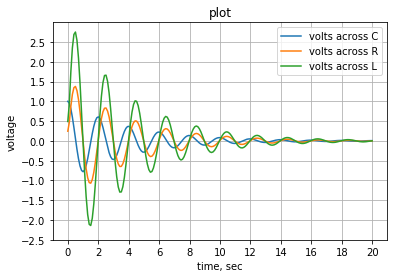

In [318]:
x = np.linspace(0, 20, 200, endpoint=True)

plt.title('plot')

plt.plot(x, np.real(func_C_voltage(x)),label='volts across C')
plt.plot(x, 0.5*np.gradient(-np.real(func_C_voltage(x)),x[1]-x[0]),label='volts across R')
plt.plot(x, np.gradient(-np.real(func_C_voltage(x)),x[1]-x[0]),label='volts across L')

plt.ylabel('voltage')
plt.xlabel('time, sec')
plt.yticks(np.arange(-2.5, 3, .5))
plt.xticks(np.arange(0, 20+1, 2.0))
plt.legend()
plt.grid()
plt.show()

## Closing comments

Need to check the voltage on the inductor
Now what is the current thru the resistor, based on above???

Spice shows current is 0 at t=0, then goes neg almost 300mA. current through L is the same as well as current through C.

voltage on R goes from 0 to almost 0.2 volts. 